In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
import sklearn as sns
#use seaborn plotting defaults
import seaborn as sns;sns.set()

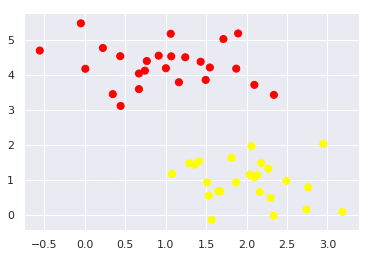

In [5]:
from sklearn.datasets.samples_generator import make_blobs
x,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn');

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


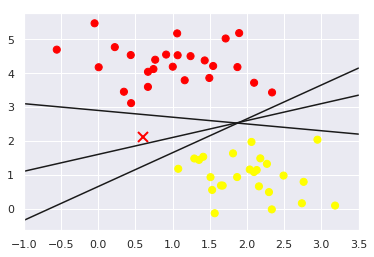

In [7]:
xfit=np.linspace(-1,3.5)
print(xfit)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5);

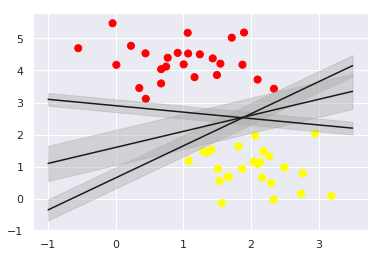

In [9]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
    
#plt.xlim(-1,3.5)

In [11]:
from sklearn.svm import SVC  #'Support vector Classifier'
model=SVC(kernel='linear',C=1E10)
model.fit(x,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    
    #create grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    
    P=model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linstyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

/home/dell/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linstyles'
  s)


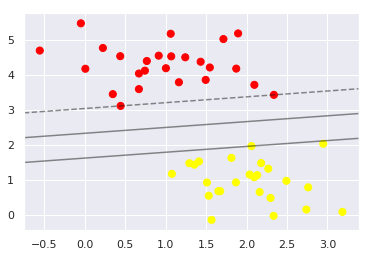

In [24]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model);